In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib as mtl

mtl.rcParams['font.sans-serif']=[u'FangSong']
np.set_printoptions(linewidth=120)

## 1.1 Numpy 数组构造

In [10]:
a=np.linspace(0,10,5) #缺省包括终止值
print(a)
a=np.logspace(0,7,8) #缺省包括终止值
print(a)
a=np.arange(0,60,10).reshape((-1,1))+np.arange(0,6,1)
print(a)

[ 0.   2.5  5.   7.5 10. ]
[1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07]
[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


In [26]:
# 使用 frombuffer, fromstring, fromfile等函数可以从字节序列创建数组
s='abcdz'
g=np.fromstring(s,dtype=np.int8)
print(g)

[ 97  98  99 100 122]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


## 1.2 Numpy 数组切片

In [35]:
a = np.arange(10)
print(a)
print(a[3:6])
print(a[:5])
print(a[3:])
print(a[1:9:2])
print(a[::-1])

[0 1 2 3 4 5 6 7 8 9]
[3 4 5]
[0 1 2 3 4]
[3 4 5 6 7 8 9]
[1 3 5 7]
[9 8 7 6 5 4 3 2 1 0]


In [45]:
#整数/布尔数组存取,使用整数序列作为下标获得的数组不和原始数组共享数据空间
a = np.logspace(0, 9, 10, base=2) #[  1.   2.   4.   8.  16.  32.  64. 128. 256. 512.]
i = np.arange(0, 10, 2) #[0 2 4 6 8]
b=a[i]
print(b)
b[0]=1000
print('a=',a)
print('b=',b)

[  1.   4.  16.  64. 256.]
a= [  1.   2.   4.   8.  16.  32.  64. 128. 256. 512.]
b= [1000.    4.   16.   64.  256.]


In [48]:
a = np.random.rand(10)
print(a)
print(a[a>0.5])

[0.23924747 0.38600225 0.29759705 0.03330487 0.96756242 0.66167324 0.27599073 0.96132714 0.94574819 0.23459142]
[0.96756242 0.66167324 0.96132714 0.94574819]


In [54]:
#二维数组的切片
a = np.arange(0, 60, 10).reshape((-1, 1)) + np.arange(6)
print(a)

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


In [58]:
print(a[[0,1,2],[2,3,4]])
print(a[4,[2,3,4]])
print(a[4:,[2,3,4]])

[ 2 13 24]
[42 43 44]
[[42 43 44]
 [52 53 54]]


In [67]:
i = np.array([True, False, True, False, False, True])
print(a[i])
print(a[i,[2,3,4]])
print(a[i,3])#降低维度
print(a[i,3:4])#保持维度

[[ 0  1  2  3  4  5]
 [20 21 22 23 24 25]
 [50 51 52 53 54 55]]
[ 2 23 54]
[ 3 23 53]
[[ 3]
 [23]
 [53]]


## 1.3 Numpy 去重复

In [68]:
a = np.array((1, 2, 3, 4, 5, 5, 7, 3, 2, 2, 8, 8))
print('原始数组：', a)
b=np.unique(a)
print('去重后：', b)

原始数组： [1 2 3 4 5 5 7 3 2 2 8 8]
去重后： [1 2 3 4 5 7 8]


In [82]:
#二维数组的去重
c = np.array(((1, 2), (3, 4), (5, 6), (1, 3), (3, 4), (7, 6)))
print(c)
#narray-->tuple->set->list->narray
np.array(list(set([tuple(t) for t in c])))

[[1 2]
 [3 4]
 [5 6]
 [1 3]
 [3 4]
 [7 6]]


array([[1, 2],
       [7, 6],
       [1, 3],
       [3, 4],
       [5, 6]])

## 1.4 Numpy stack and axis

In [84]:
a = np.arange(1, 10).reshape((3, 3))
b = np.arange(11, 20).reshape((3, 3))
c = np.arange(101, 110).reshape((3, 3))

In [86]:
print('axis=0',np.stack((a,b,c),axis=0))

axis=0 [[[  1   2   3]
  [  4   5   6]
  [  7   8   9]]

 [[ 11  12  13]
  [ 14  15  16]
  [ 17  18  19]]

 [[101 102 103]
  [104 105 106]
  [107 108 109]]]


In [87]:
print('axis=1',np.stack((a,b,c),axis=1))

axis=1 [[[  1   2   3]
  [ 11  12  13]
  [101 102 103]]

 [[  4   5   6]
  [ 14  15  16]
  [104 105 106]]

 [[  7   8   9]
  [ 17  18  19]
  [107 108 109]]]


In [89]:
print('axis=2',np.stack((a,b,c),axis=2))

axis=2 [[[  1  11 101]
  [  2  12 102]
  [  3  13 103]]

 [[  4  14 104]
  [  5  15 105]
  [  6  16 106]]

 [[  7  17 107]
  [  8  18 108]
  [  9  19 109]]]


## 2.1 绘制高斯曲线

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


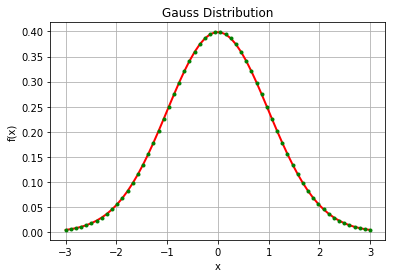

In [115]:
mu,sigma=0,1
x=np.linspace(mu-3*sigma,mu+3*sigma,60)
y=np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)
plt.figure(facecolor='w')
plt.plot(x,y,'r-',x,y,'go',linewidth=2,markersize=3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(u'Gauss Distribution')
plt.grid()

## 2.2 绘制损失函数

Text(0.5,1,'sigmoid')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


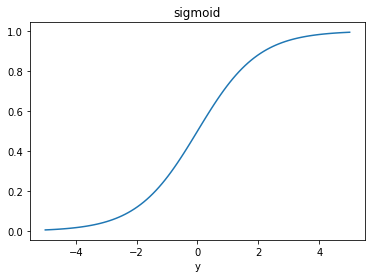

In [118]:
def sigmoid(x):return 1/(1+np.exp(-x))
x=np.linspace(-5,5,100)
y=sigmoid(x)
plt.plot(x,y)
plt.xlabel('x')
plt.xlabel('y')
plt.title('sigmoid')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


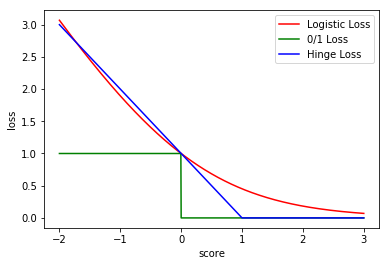

In [129]:
#过（0,1）点
x =np.linspace(start=-2, stop=3, num=1001, dtype=np.float)
y_logistic=-np.log(sigmoid(x))/np.log(2)
plt.plot(x,y_logistic,'r-',label='Logistic Loss')

y_01=x<0
plt.plot(x,y_01,'g-',label='0/1 Loss')

y_hinge=1-x
y_hinge[y_hinge<0]=0
plt.plot(x,y_hinge,'b-',label='Hinge Loss')

plt.xlabel('score')
plt.ylabel('loss')
plt.legend(loc='upper right')

## 2.3 绘制概率分布

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


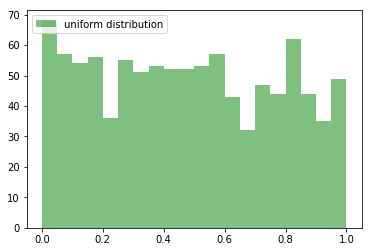

In [135]:
#均匀分布
x=np.random.rand(1000)
plt.hist(x,bins=20,color='g',alpha=0.5,label='uniform distribution')
plt.legend(loc='upper left')